Q.1 
Matrix multiplication of (n,k) matrix A and (k,m) matrix B requires:  
Total Multiplications
$$
(n)\times(m)\times(k)
$$

Total additions
$$
(n)\times(m)\times(k-1)
$$

Explanation:  
Multiplying matrix A and matrix B gives matrix C. As a result, to compute C[i,j], the dot product of the i-th row of matrix A and the jth column of matrix B is done. So, it is multiplying corresponding elements and summing up the results.  

For one C[i,j], there will be k multiplications and k-1 additions. But there are n rows and m columns, so the number of multiplications $$
(n)\times(m)\times(k)$$ and additions will be $$(n)\times(m)\times(k-1)$$

In [41]:
#Q.2. 
def multiply_matrices(a, b):
    n = len(a)
    k = len(a[0])
    m = len(b[0])

   
    result = [[0 for _ in range(m)] for _ in range(n)]

 
    for i in range(n):
        for j in range(m):
            for p in range(k):
                result[i][j] += a[i][p] * b[p][j]

    return result

import numpy as np
import time


A = [[1, 2], [3, 4], [5, 6]]
B = [[7, 8], [9, 10]]

start_time = time.time()
result_lists = multiply_matrices(A, B)
end_time = time.time()
print("Result using lists of lists:", result_lists)
print("Time using lists of lists:", end_time - start_time)


A_np = np.array(A)
B_np = np.array(B)

start_time = time.time()
result_np = np.dot(A_np, B_np)
end_time = time.time()
print("Result using NumPy:", result_np)
print("Time using NumPy:", end_time - start_time)


Result using lists of lists: [[25, 28], [57, 64], [89, 100]]
Time using lists of lists: 0.0
Result using NumPy: [[ 25  28]
 [ 57  64]
 [ 89 100]]
Time using NumPy: 0.0


In [42]:
#Q.3.

# Finding the median of an array using the described method would involve sorting the array first, which typically requires more than one pass. If you use a sorting algorithm that makes multiple passes, the overall time complexity for finding the median would be higher.
# A more efficient method for finding the median is to use a linear-time algorithm like the QuickSelect algorithm. QuickSelect is based on the QuickSort algorithm and can find the k-th smallest element in an unordered list in linear time on average.

import numpy as np
import time

def find_median_sorting(arr):
    sorted_arr = sorted(arr)
    n = len(sorted_arr)
    if n % 2 == 0:
        return (sorted_arr[n // 2 - 1] + sorted_arr[n // 2]) / 2
    else:
        return sorted_arr[n // 2]

def partition(arr, low, high):
    pivot = arr[high]
    i = low - 1

    for j in range(low, high):
        if arr[j] <= pivot:
            i += 1
            arr[i], arr[j] = arr[j], arr[i]

    arr[i + 1], arr[high] = arr[high], arr[i + 1]
    return i + 1

def quick_select(arr, low, high, k):
    if low <= high:
        pi = partition(arr, low, high)

        if pi == k:
            return arr[pi]
        elif pi < k:
            return quick_select(arr, pi + 1, high, k)
        else:
            return quick_select(arr, low, pi - 1, k)

def find_median_quickselect(arr):
    n = len(arr)
    if n % 2 == 0:
        return (quick_select(arr, 0, n - 1, n // 2 - 1) + quick_select(arr, 0, n - 1, n // 2)) / 2
    else:
        return quick_select(arr, 0, n - 1, n // 2)

arr = np.random.rand(10**6)


start_time = time.time()
median_sorting = find_median_sorting(arr)
print("Median (Sorting Method):", median_sorting)
print("Time taken (Sorting Method):", time.time() - start_time)

start_time = time.time()
median_quickselect = find_median_quickselect(arr.tolist())
print("Median (QuickSelect Method):", median_quickselect)
print("Time taken (QuickSelect Method):", time.time() - start_time)

start_time = time.time()
median_numpy = np.median(arr)
print("Median (NumPy):", median_numpy)
print("Time taken (NumPy):", time.time() - start_time)


Median (Sorting Method): 0.49960851902150333
Time taken (Sorting Method): 1.6370878219604492
Median (QuickSelect Method): 0.49960851902150333
Time taken (QuickSelect Method): 22.44742751121521
Median (NumPy): 0.49960851902150333
Time taken (NumPy): 0.026517868041992188


Q.4.
For finding the gradient of the given expression:
$$
\frac{\partial f}{\partial x} = 2xy + y^3\cos(x)
$$
$$
\frac{\partial f}{\partial y} = x^2 + 3y^2\sin(x)
$$

Gradient: 
$$
\frac{\partial f}{\partial x}+\frac{\partial f}{\partial y} = (2xy + y^3\cos(x)+x^2 + 3y^2\sin(x))
$$



In [43]:
#Q.5.
import jax
import jax.numpy as jnp

def f(x, y):
    return x**2*y + y**3 * jnp.sin(x)

grad_f = jax.grad(f, argnums=(0, 1))
x_val = 2.0
y_val = 1.5

analytical_gradient = (2 * x_val*y_val+ y_val**3 * jnp.cos(x_val),x_val**2+ 3 * y_val**2 * jnp.sin(x_val))
jax_gradient = grad_f(x_val, y_val)

print("Analytical Gradient:", analytical_gradient)
print("JAX Gradient:", jax_gradient)


Analytical Gradient: (Array(4.5955043, dtype=float32, weak_type=True), Array(10.137757, dtype=float32, weak_type=True))
JAX Gradient: (Array(4.5955043, dtype=float32, weak_type=True), Array(10.137757, dtype=float32, weak_type=True))


In [44]:
#Q.6.
import sympy as sp

x, y = sp.symbols('x y')
f = x**2*y+ y**3 * sp.sin(x)

df_dx = sp.diff(f, x)
df_dy = sp.diff(f, y)
gradient = sp.Matrix([df_dx, df_dy])

print("Partial derivative with respect to x:")
sp.pprint(df_dx)
print("\nPartial derivative with respect to y:")
sp.pprint(df_dy)

x_val = 2.0
y_val = 1.5

analytical_gradient = gradient.subs({x: x_val, y: y_val})
print("\nAnalytical Gradient at x={}, y={}: {}".format(x_val, y_val, analytical_gradient))


Partial derivative with respect to x:
         3       
2⋅x⋅y + y ⋅cos(x)

Partial derivative with respect to y:
 2      2       
x  + 3⋅y ⋅sin(x)

Analytical Gradient at x=2.0, y=1.5: Matrix([[4.59550442665339], [10.1377576310734]])


In [45]:
#Q.7.
students_records = {
    2022: {
        'Branch 1': [
            {'Roll Number': 1, 'Name': 'N', 'Marks': {'Maths': 100, 'English': 70}},
            
        ],
        'Branch 2': [
           
        ]
    },
    2023: {
        'Branch 1': [
        
        ],
        'Branch 2': [
           
        ]
    },
    2024: {
        'Branch 1': [
          
        ],
        'Branch 2': [
           
        ]
    },
    2025: {
        'Branch 1': [
           
        ],
        'Branch 2': [
           
        ]
    }
}

year = 2022
branch = 'Branch 1'
student_index = 0

roll_number = students_records[year][branch][student_index]['Roll Number']
name = students_records[year][branch][student_index]['Name']
marks = students_records[year][branch][student_index]['Marks']

print(f"Year: {year}, Branch: {branch}, Roll Number: {roll_number}, Name: {name}, Marks: {marks}")


Year: 2022, Branch: Branch 1, Roll Number: 1, Name: N, Marks: {'Maths': 100, 'English': 70}


In [46]:
#Q.8.
class Student:
    def __init__(self, roll_number, name, marks):
        self.roll_number = roll_number
        self.name = name
        self.marks = marks

class Branch:
    def __init__(self, name, students):
        self.name = name
        self.students = students

class Year:
    def __init__(self, year, branches):
        self.year = year
        self.branches = branches


student1 = Student(1, 'N', {'Maths': 100, 'English': 70})
student2 = Student(2, 'M', {'Maths': 90, 'English': 80})

branch1 = Branch('Branch 1', [student1, student2])
branch2 = Branch('Branch 2', [])

year2022 = Year(2022, [branch1, branch2])


database = [year2022]

selected_year = 2022
selected_branch = 'Branch 1'
selected_student_index = 0

selected_student = database[0].branches[0].students[selected_student_index]
print(f"Year: {selected_year}, Branch: {selected_branch}, Roll Number: {selected_student.roll_number}, Name: {selected_student.name}, Marks: {selected_student.marks}")


Year: 2022, Branch: Branch 1, Roll Number: 1, Name: N, Marks: {'Maths': 100, 'English': 70}


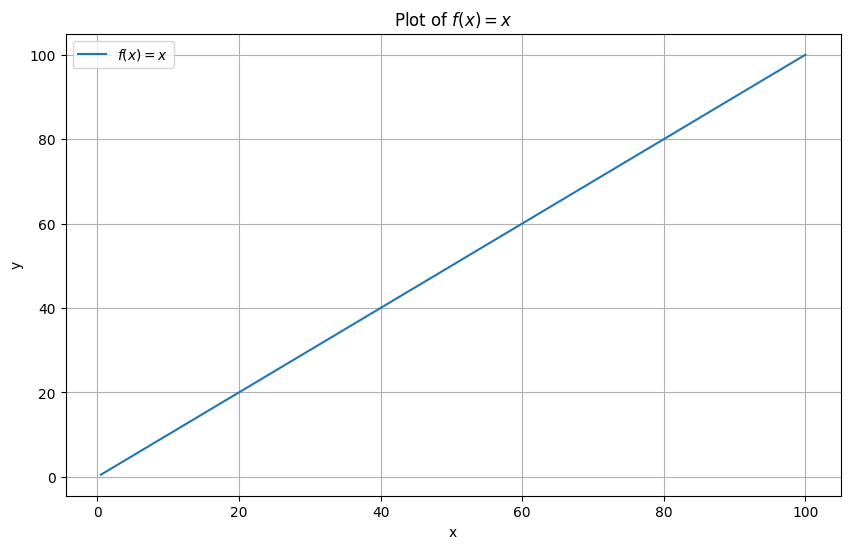

In [47]:
#Q.9.
#1. y=x
import matplotlib.pyplot as plt
import numpy as np
def f(x):
    return x

x_values = np.arange(0.5, 100.5, 0.5)
y_values_f = f(x_values)

plt.figure(figsize=(10, 6))
plt.plot(x_values, y_values_f, label='$f(x) = x$')

plt.xlabel('x')
plt.ylabel('y')
plt.title('Plot of $f(x) = x$')
plt.legend()
          
plt.grid(True)
plt.show()


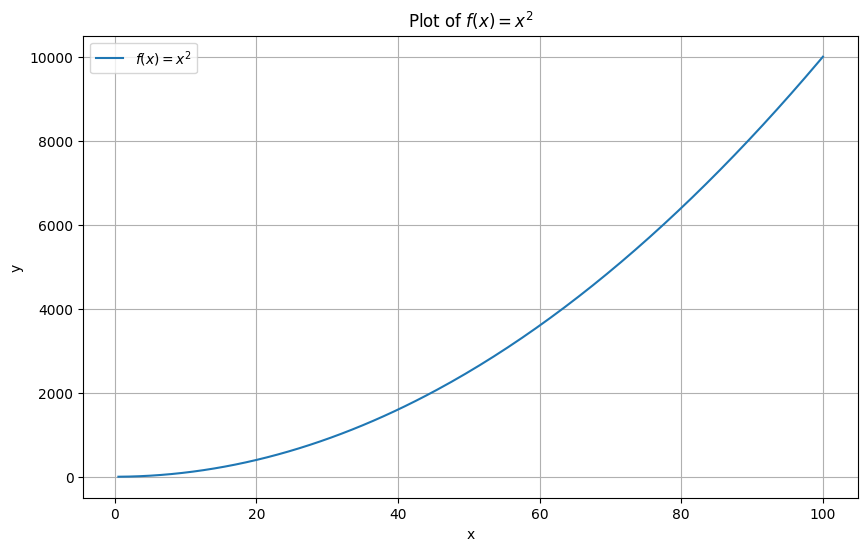

In [48]:
#Q.9.
#2
import matplotlib.pyplot as plt
import numpy as np
def f(x):
    return x**2

x_values = np.arange(0.5, 100.5, 0.5)
y_values_f = f(x_values)

plt.figure(figsize=(10, 6))
plt.plot(x_values, y_values_f, label='$f(x) =x^{2} $')

plt.xlabel('x')
plt.ylabel('y')
plt.title('Plot of $f(x) = x^{2}$')
plt.legend()
          
plt.grid(True)
plt.show()

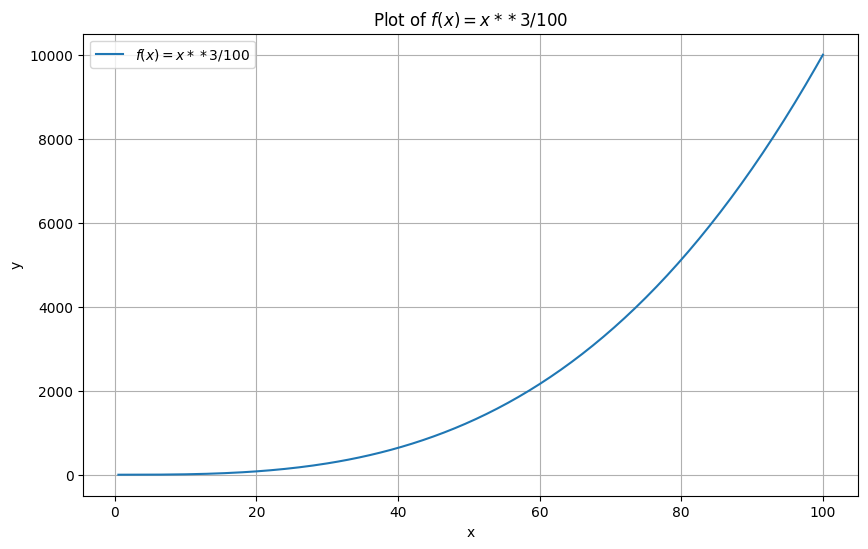

In [49]:
#Q.9.
#3
import matplotlib.pyplot as plt
import numpy as np
def f(x):
    return x**3/100

x_values = np.arange(0.5, 100.5, 0.5)
y_values_f = f(x_values)

plt.figure(figsize=(10, 6))
plt.plot(x_values, y_values_f, label='$f(x) = x**3/100$')

plt.xlabel('x')
plt.ylabel('y')
plt.title('Plot of $f(x) = x**3/100$')
plt.legend()
          
plt.grid(True)
plt.show()

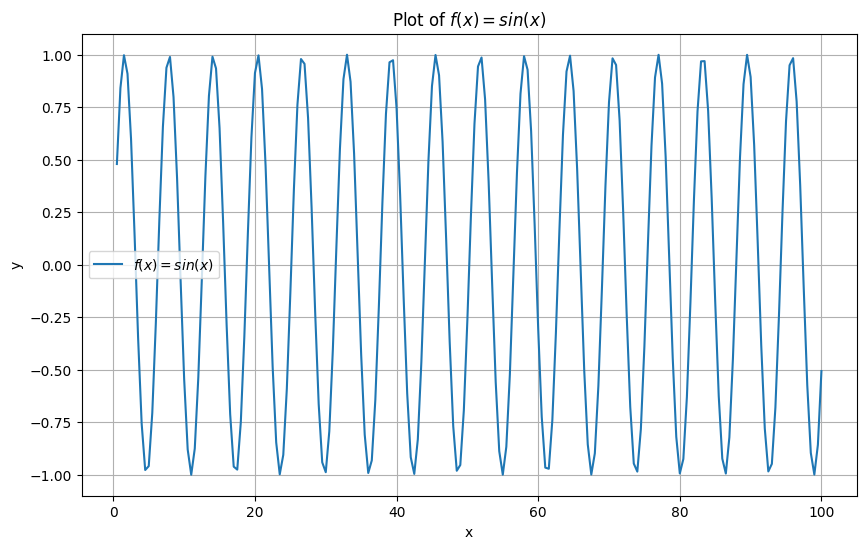

In [50]:
#Q.9.
#4
import matplotlib.pyplot as plt
import numpy as np
def f(x):
    return np.sin(x)

x_values = np.arange(0.5, 100.5, 0.5)
y_values_f = f(x_values)

plt.figure(figsize=(10, 6))
plt.plot(x_values, y_values_f, label='$f(x) = sin(x)$')

plt.xlabel('x')
plt.ylabel('y')
plt.title('Plot of $f(x) = sin(x)$')
plt.legend()
          
plt.grid(True)
plt.show()

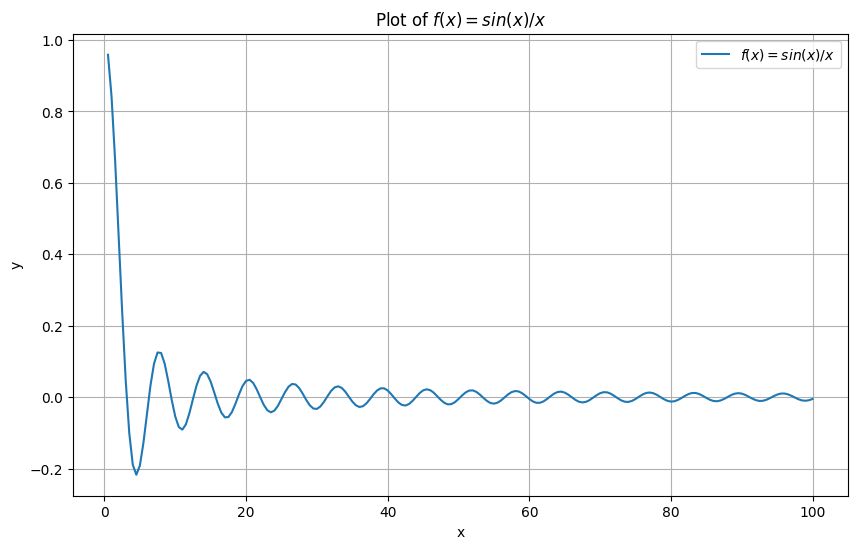

In [51]:
#Q.9.
#5
import matplotlib.pyplot as plt
import numpy as np
def f(x):
    return np.sin(x)/x

x_values = np.arange(0.5, 100.5, 0.5)
y_values_f = f(x_values)

plt.figure(figsize=(10, 6))
plt.plot(x_values, y_values_f, label='$f(x) = sin(x)/x$')

plt.xlabel('x')
plt.ylabel('y')
plt.title('Plot of $f(x) = sin(x)/x$')
plt.legend()
          
plt.grid(True)
plt.show()

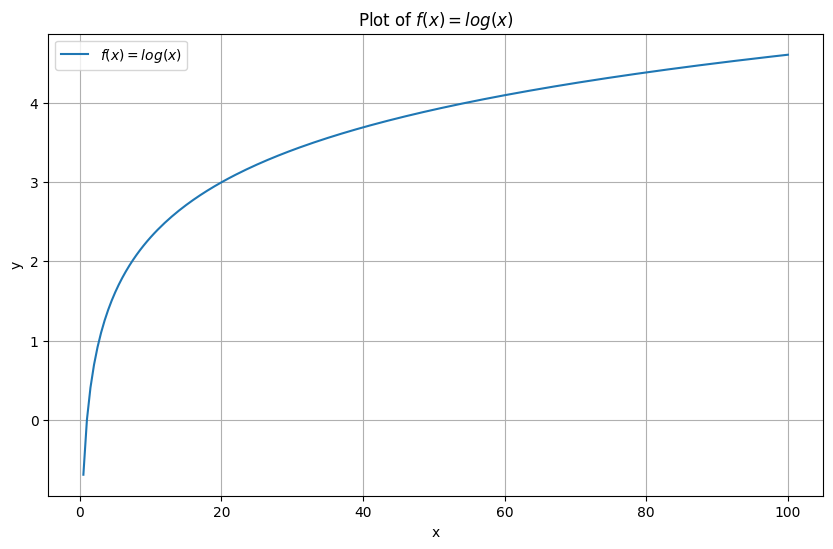

In [52]:
#Q.9.
#6
import matplotlib.pyplot as plt
import numpy as np
def f(x):
    return np.log(x)

x_values = np.arange(0.5, 100.5, 0.5)
y_values_f = f(x_values)

plt.figure(figsize=(10, 6))
plt.plot(x_values, y_values_f, label='$f(x) = log(x)$')

plt.xlabel('x')
plt.ylabel('y')
plt.title('Plot of $f(x) = log(x)$')
plt.legend()
          
plt.grid(True)
plt.show()

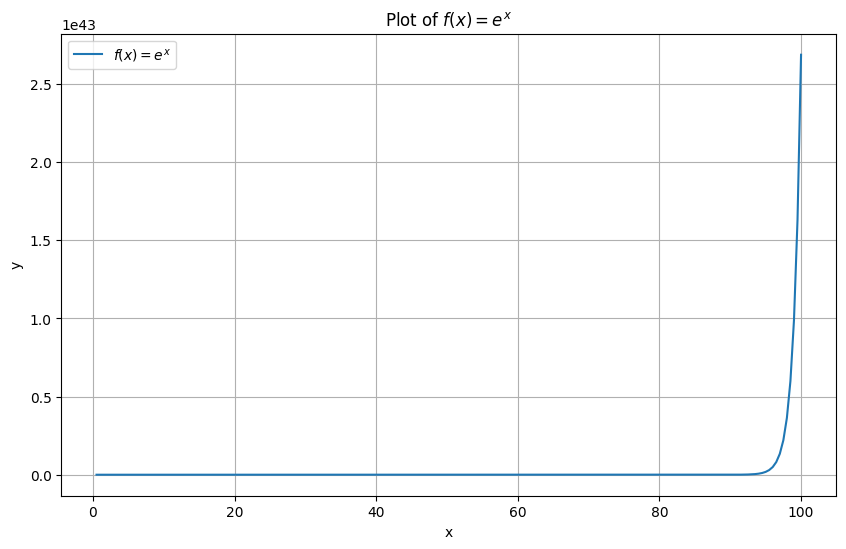

In [53]:
#Q.9.
#7
import matplotlib.pyplot as plt
import numpy as np
def f(x):
    return np.exp(x)

x_values = np.arange(0.5, 100.5, 0.5)
y_values_f = f(x_values)

plt.figure(figsize=(10, 6))
plt.plot(x_values, y_values_f, label='$f(x) = e^x$')

plt.xlabel('x')
plt.ylabel('y')
plt.title('Plot of $f(x) = e^x$')
plt.legend()

plt.grid(True)
plt.show()

In [54]:
#Q.10
import numpy as np
import pandas as pd

random_matrix = np.random.uniform(1, 2, size=(20, 5))
df = pd.DataFrame(random_matrix, columns=['a', 'b', 'c', 'd', 'e'])

print("DataFrame:")
print(df)

max_std_column = df.std().idxmax()
min_mean_row = df.mean(axis=1).idxmin()

print("Column with highest standard deviation:", max_std_column)
print("Row with lowest mean:", min_mean_row)


DataFrame:
           a         b         c         d         e
0   1.034694  1.254069  1.157401  1.277337  1.539463
1   1.378556  1.640721  1.728308  1.993076  1.642783
2   1.064608  1.525670  1.561099  1.069690  1.766633
3   1.932368  1.116603  1.734053  1.851561  1.341538
4   1.853149  1.564605  1.304786  1.227429  1.115984
5   1.136486  1.852386  1.094690  1.864373  1.506447
6   1.913089  1.920408  1.818711  1.608312  1.497959
7   1.511360  1.037124  1.768108  1.870876  1.685339
8   1.939758  1.233778  1.106472  1.412559  1.175411
9   1.703516  1.799301  1.939673  1.701272  1.307008
10  1.365456  1.563932  1.442310  1.473107  1.160719
11  1.989526  1.457895  1.675372  1.193880  1.425331
12  1.654561  1.937644  1.819939  1.688231  1.167633
13  1.421687  1.340943  1.074135  1.134287  1.479269
14  1.504003  1.829218  1.146942  1.467643  1.151793
15  1.469337  1.933735  1.938913  1.038447  1.437472
16  1.637346  1.499954  1.404089  1.015578  1.975586
17  1.842968  1.601171  1.212757  1

In [55]:
#Q.11
import numpy as np
import pandas as pd

random_matrix = np.random.uniform(1, 2, size=(20, 5))
df = pd.DataFrame(random_matrix, columns=['a', 'b', 'c', 'd', 'e'])

df['f'] = df[['a', 'b', 'c', 'd', 'e']].sum(axis=1)
df['g'] = np.where(df['f'] < 8, 'LT8', 'GT8')

print("Updated DataFrame:")
print(df)

lt8_count = (df['g'] == 'LT8').sum()
std_lt8 = df.loc[df['g'] == 'LT8', 'f'].std()
std_gt8 = df.loc[df['g'] == 'GT8', 'f'].std()

print("\nNumber of rows where the value in column 'g' is 'LT8':", lt8_count)
print("Standard deviation of column 'f' for rows where 'g' is 'LT8':", std_lt8)
print("Standard deviation of column 'f' for rows where 'g' is 'GT8':", std_gt8)


Updated DataFrame:
           a         b         c         d         e         f    g
0   1.159606  1.412147  1.131217  1.398837  1.173097  6.274904  LT8
1   1.136723  1.286570  1.003238  1.679823  1.224106  6.330459  LT8
2   1.521429  1.195432  1.829888  1.252148  1.154035  6.952931  LT8
3   1.875254  1.252087  1.623952  1.929595  1.315397  7.996284  LT8
4   1.437878  1.259792  1.747221  1.663881  1.250855  7.359627  LT8
5   1.962566  1.981185  1.011701  1.935832  1.988132  8.879417  GT8
6   1.560483  1.366613  1.596948  1.795685  1.044763  7.364492  LT8
7   1.823335  1.779222  1.394718  1.224807  1.509283  7.731365  LT8
8   1.743994  1.520907  1.430168  1.376378  1.690165  7.761612  LT8
9   1.840188  1.478520  1.065470  1.413987  1.367255  7.165420  LT8
10  1.878133  1.265862  1.667419  1.213455  1.345709  7.370578  LT8
11  1.111362  1.882893  1.705698  1.511415  1.206895  7.418263  LT8
12  1.297126  1.990568  1.859357  1.337632  1.638259  8.122943  GT8
13  1.197151  1.976583  1.991

In [56]:
#Q.12
import numpy as np

a = np.array([1, 2, 3, 4, 5])
b = 10

result = a + b
print("Example 1 - Broadcasting a scalar to a 1D array:")
print("a:", a)
print("b:", b)
print("Result:", result)
print()

c = np.array([[1, 2, 3], [4, 5, 6]])
d = 2

result2 = c * d
print("Example 2 - Broadcasting a scalar to a 2D array:")
print("c:")
print(c)
print("d:", d)
print("Result:")
print(result2)
print()

e = np.array([[1, 2, 3], [4, 5, 6]])
f = np.array([10, 20, 30])

result3 = e + f
print("Example 3 - Broadcasting arrays with different shapes:")
print("e:")
print(e)
print("f:", f)
print("Result:")
print(result3)



Example 1 - Broadcasting a scalar to a 1D array:
a: [1 2 3 4 5]
b: 10
Result: [11 12 13 14 15]

Example 2 - Broadcasting a scalar to a 2D array:
c:
[[1 2 3]
 [4 5 6]]
d: 2
Result:
[[ 2  4  6]
 [ 8 10 12]]

Example 3 - Broadcasting arrays with different shapes:
e:
[[1 2 3]
 [4 5 6]]
f: [10 20 30]
Result:
[[11 22 33]
 [14 25 36]]


In [57]:
#Q.13
import numpy as np

def custom_argmin(arr):
    min_index = 0
    min_value = arr[0]

    for i in range(1, len(arr)):
        if arr[i] < min_value:
            min_value = arr[i]
            min_index = i

    return min_index

arr = np.array([3, 1, 4, 1, 5, 9, 2, 6, 5, 3, 5])
custom_result = custom_argmin(arr)


np_result = np.argmin(arr)

print("Array:", arr)
print("Index of the minimum element (custom):", custom_result)
print("Index of the minimum element (np.argmin):", np_result)


Array: [3 1 4 1 5 9 2 6 5 3 5]
Index of the minimum element (custom): 1
Index of the minimum element (np.argmin): 1
